In [1]:
from pandas import read_csv
import pandas
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [2]:
url = "https://raw.githubusercontent.com/dataprofessor/data/master/penguins_cleaned.csv"

In [3]:
dataset = read_csv(url)

In [4]:
print(dataset.head(50))

   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   Adelie  Torgersen            39.1           18.7                181   
1   Adelie  Torgersen            39.5           17.4                186   
2   Adelie  Torgersen            40.3           18.0                195   
3   Adelie  Torgersen            36.7           19.3                193   
4   Adelie  Torgersen            39.3           20.6                190   
5   Adelie  Torgersen            38.9           17.8                181   
6   Adelie  Torgersen            39.2           19.6                195   
7   Adelie  Torgersen            41.1           17.6                182   
8   Adelie  Torgersen            38.6           21.2                191   
9   Adelie  Torgersen            34.6           21.1                198   
10  Adelie  Torgersen            36.6           17.8                185   
11  Adelie  Torgersen            38.7           19.0                195   
12  Adelie  Torgersen    

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [6]:
dataset["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [7]:
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


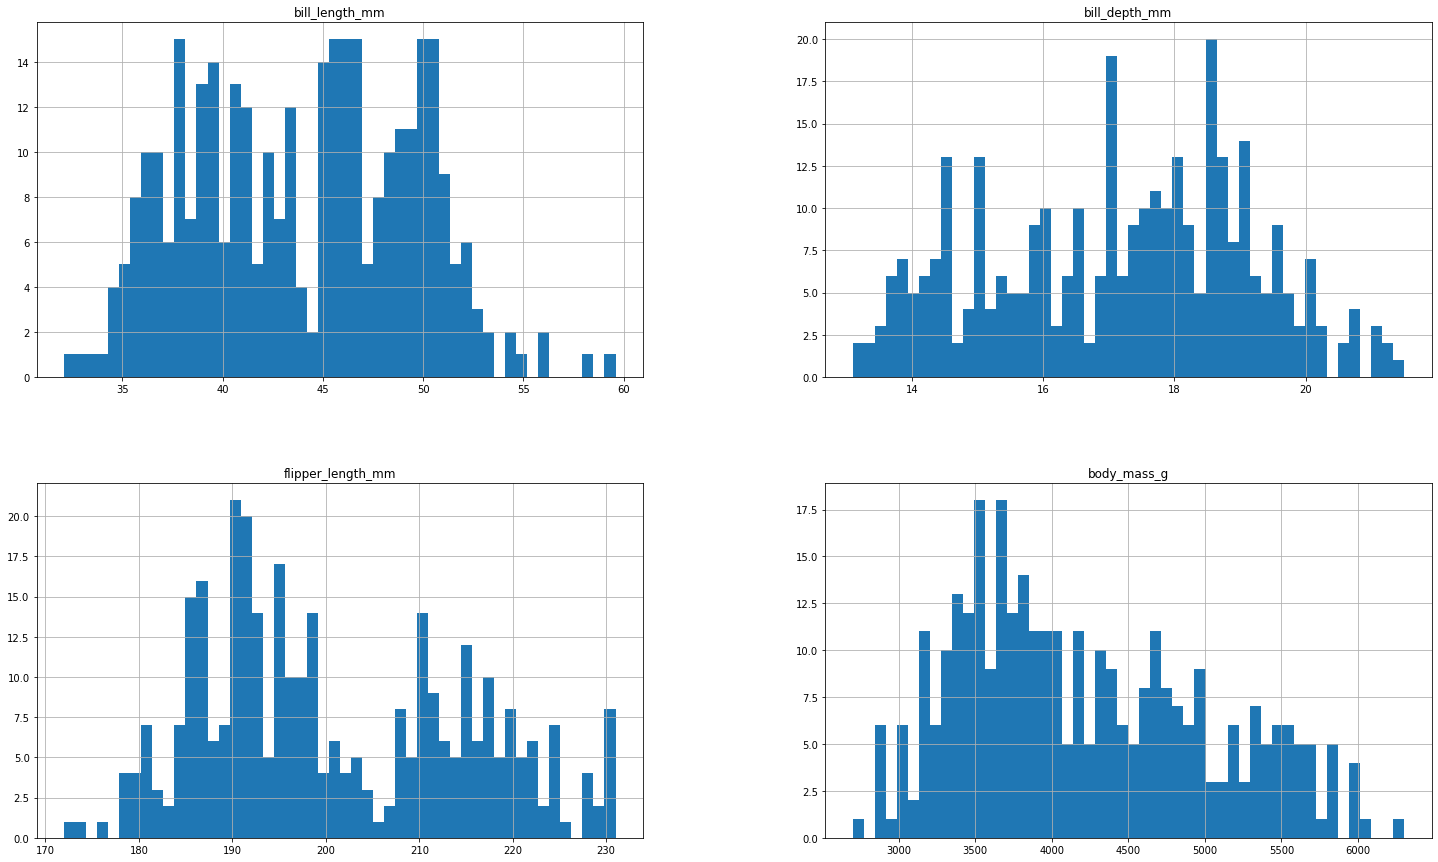

In [8]:
%matplotlib inline
dataset.hist(bins=50, figsize=(25, 15))
plt.show()

In [9]:
dataset["island"].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [10]:
dataset["sex"].value_counts()

male      168
female    165
Name: sex, dtype: int64

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dataset["sex"])
classes = le.classes_
sexx = list(le.transform(dataset["sex"]))

In [12]:
sex = pandas.DataFrame(data = sexx, columns=['sex'])
sex.head()

,sex
0,1
1,0
2,0
3,0
4,1


In [13]:
le.fit(dataset["island"])
le.classes_
island = list(le.transform(dataset["island"]))
island = pandas.DataFrame(data = island, columns=['island'])
island.head()

,island
0,2
1,2
2,2
3,2
4,2


In [14]:
le.fit(dataset["species"])
le.classes_
species = list(le.transform(dataset["species"]))
species = pandas.DataFrame(data = species, columns=['species'])
species.head()

,species
0,0
1,0
2,0
3,0
4,0


In [15]:
new_data = dataset
new_data.drop(['species'], axis=1, inplace=True)
new_data.drop(['sex'], axis=1, inplace=True)
new_data.drop(['island'], axis=1, inplace=True)

In [16]:
new_data["sex"] = sex['sex']
new_data["island"] = island['island']
new_data["species"] = species['species']
new_data.head(50)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island,species
0,39.1,18.7,181,3750,1,2,0
1,39.5,17.4,186,3800,0,2,0
2,40.3,18.0,195,3250,0,2,0
3,36.7,19.3,193,3450,0,2,0
4,39.3,20.6,190,3650,1,2,0
5,38.9,17.8,181,3625,0,2,0
6,39.2,19.6,195,4675,1,2,0
7,41.1,17.6,182,3200,0,2,0
8,38.6,21.2,191,3800,1,2,0
9,34.6,21.1,198,4400,1,2,0


In [17]:
array = new_data.values
X = array[:, 0:6]
y = array[:, 6]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [19]:
classifiers = [('LR', LogisticRegression(solver='liblinear', multi_class='ovr')), ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()), ('SVM', SVC(gamma='auto', kernel='linear')), ('RF', RandomForestClassifier())]

In [20]:
results = []
names = []
for name, classifier in classifiers:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.981054 (0.025594)
KNN: 0.811681 (0.048779)
CART: 0.958547 (0.042265)
NB: 0.970085 (0.022324)
SVM: 0.992450 (0.015103)
RF: 0.981054 (0.018952)


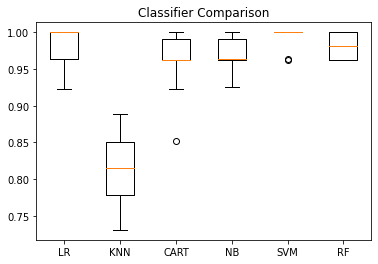

In [21]:
%matplotlib inline
plt.boxplot(results, labels=names)
plt.title('Classifier Comparison')
plt.show()

In [22]:
RF = RandomForestClassifier()
SVM = SVC(gamma='auto', kernel='linear')
rf_model = RF.fit(X_train, y_train)
svm_model = SVM.fit(X_train, y_train)
rf_prediction = rf_model.predict(X_test)
svm_prediction = svm_model.predict(X_test)

In [23]:
rf_accuracy = accuracy_score(y_test, rf_prediction) * 100
svm_accuracy = accuracy_score(y_test, svm_prediction) * 100
print('Random Rorest Prediction accuracy: ' + str("%.4f" % rf_accuracy) + '%')
print('SVM Prediction accuracy: ' + str("%.4f" % svm_accuracy) + '%')

Random Rorest Prediction accuracy: 95.5224%
SVM Prediction accuracy: 98.5075%


In [24]:
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))

In [26]:
pickle.dump(svm_model, open('svm_model.pkl', 'wb'))

In [39]:
svm_model.predict(X_test)

array([0., 1., 2., 2., 0., 2., 0., 2., 0., 2., 2., 0., 0., 2., 2., 2., 2.,
       2., 0., 0., 2., 0., 0., 0., 0., 0., 1., 0., 1., 2., 2., 1., 2., 0.,
       1., 0., 0., 2., 0., 2., 0., 1., 2., 2., 1., 2., 0., 0., 0., 1., 0.,
       0., 0., 2., 1., 2., 1., 0., 1., 1., 2., 2., 2., 0., 0., 0., 2.])